# Preliminary analysis on TERMINET SCHN data (may 2023)

In [64]:
import pandas as pd
from scipy.stats import pearsonr

In [65]:
df1 = pd.read_csv("../data/20230319_RTU_Dataset_PPC-Lab/part1.csv", parse_dates = ["time"], index_col = ["time"])
df2 = pd.read_csv("../data/20230319_RTU_Dataset_PPC-Lab/part2.csv", parse_dates = ["time"], index_col = ["time"])

In [66]:
df1.index[-1] - df1.index[0]

Timedelta('10 days 05:01:07.020000')

In [67]:
df2.index[-1] - df2.index[0]

Timedelta('9 days 05:29:45.759000')

array([<Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>], dtype=object)

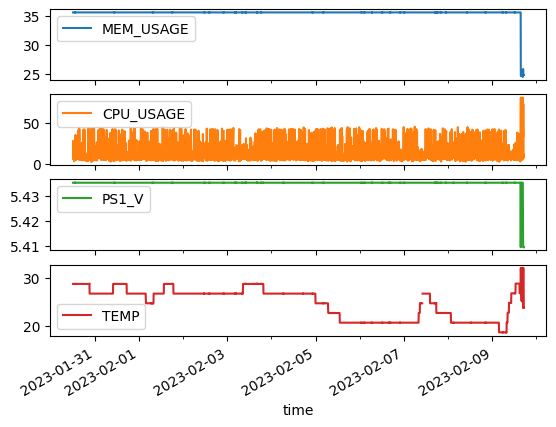

In [68]:
df1.plot(subplots=True)

array([<Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>], dtype=object)

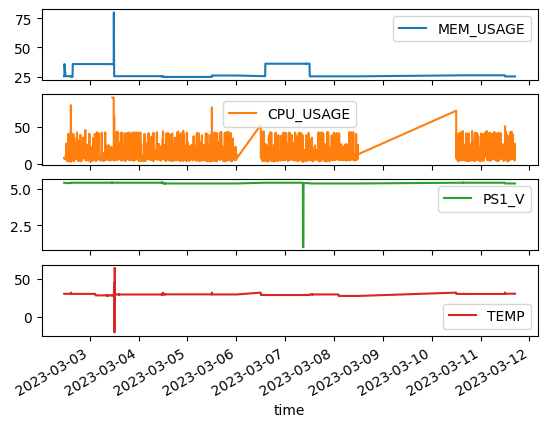

In [69]:
df2.plot(subplots=True)

## The two dataset cannot be merged, chosing df1

In [70]:
df1.drop(['PS1_V'], axis = 1, inplace = True) 

In [71]:
df = df1

In [72]:
print("len(df[CPU_USAGE]):", len(df["CPU_USAGE"]))
print("len(df[MEM_USAGE]):", len(df["MEM_USAGE"]))
print("len(df[TEMP]):", len(df["TEMP"]))
print("len(df.index):", len(df.index))

len(df[CPU_USAGE]): 2841
len(df[MEM_USAGE]): 2841
len(df[TEMP]): 2841
len(df.index): 2841


In [73]:
df = df.dropna()
df.to_pickle("../data/20230319_RTU_Dataset_PPC-Lab/df1.pkl")
MEM_USEs = df["MEM_USAGE"].dropna()
CPUs = df["CPU_USAGE"].dropna()
TEMPs = df["TEMP"].dropna()
TIMEs = df.index.dropna()

In [74]:
print("len(CPUs):", len(CPUs))
print("len(MEM_USEs):", len(MEM_USEs))
print("len(TEMPs):", len(TEMPs))
print("len(TIMEs):", len(TIMEs))

len(CPUs): 2778
len(MEM_USEs): 2778
len(TEMPs): 2778
len(TIMEs): 2778


array([<Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>], dtype=object)

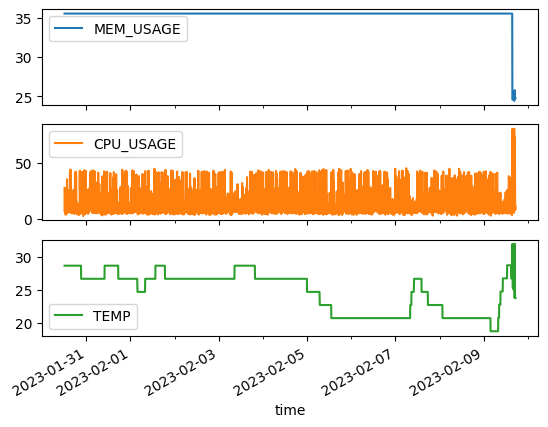

In [75]:
df.plot(subplots=True)

# Correlations

## CPU

In [76]:
print("pearsonr(CPUs, TEMPs): ", pearsonr(CPUs, TEMPs)[1])
print("pearsonr(CPUs, MEM_USEs): ", pearsonr(CPUs, MEM_USEs)[1])
print("pearsonr(CPUs, PS1_Vs): ", pearsonr(CPUs, PS1_Vs)[1])

pearsonr(CPUs, TEMPs):  0.850381813102178
pearsonr(CPUs, MEM_USEs):  4.101759519308132e-12
pearsonr(CPUs, PS1_Vs):  3.87609948686603e-06


## MEMORY USAGE


In [77]:
print("pearsonr(MEM_USEs, TEMPs): ", pearsonr(MEM_USEs, TEMPs)[1])
print("pearsonr(MEM_USEs, PS1_Vs): ", pearsonr(MEM_USEs, PS1_Vs)[1])

pearsonr(MEM_USEs, TEMPs):  0.00751867807922447
pearsonr(MEM_USEs, PS1_Vs):  5.858120248814131e-259


## PS1_vs

In [78]:
print("pearsonr(PS1_Vs, TEMPs): ", pearsonr(PS1_Vs, TEMPs)[1])

pearsonr(PS1_Vs, TEMPs):  0.23969460687278013


## Conclusions from a preliminary analysis
There is no correlation with errors, since there are not errors in the dataset.
There is a strong corellation between:
- CPUs and TEMPs (0.83)
